In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("C:\\Users\\midhu\\Downloads\\train.csv", na_values = "na")
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,pos,153204,0.0,182.0,NaN,0.0,0.0,0.0,0.0,0.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0
1,pos,453236,NaN,2926.0,NaN,0.0,0.0,0.0,0.0,222.0,...,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0,0.0,0.0
2,pos,72504,NaN,1594.0,1052.0,0.0,0.0,0.0,244.0,178226.0,...,1432098.0,372252.0,527514.0,358274.0,332818.0,284178.0,3742.0,0.0,0.0,0.0
3,pos,762958,NaN,NaN,NaN,NaN,NaN,776.0,281128.0,2186308.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pos,695994,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,1397742.0,495544.0,361646.0,28610.0,5130.0,212.0,0.0,0.0,NaN,NaN


In [4]:
df.shape

(36188, 171)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36188 entries, 0 to 36187
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 47.2+ MB


In [7]:
df.isnull().sum()

class         0
aa_000        0
ab_000    27896
ac_000     2141
ad_000     9200
          ...  
ee_007      379
ee_008      379
ee_009      379
ef_000     1730
eg_000     1729
Length: 171, dtype: int64

In [8]:
#since this data is imbalance and require to be balanced 
df['class'].value_counts()

class
neg    35188
pos     1000
Name: count, dtype: int64

In [17]:
numeric_features = [i for i in df.columns if df[i].dtype != 'object']
cat_features = [i for i in df.columns if df[i].dtype == 'object']
print(f"The features with numerical values is {len(numeric_features)}")
print(f"The features with categorical values is {len(cat_features)}")

The features with numerical values is 170
The features with categorical values is 1


In [18]:
missing = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by = 0 ,ascending = False)
missing

,0
br_000,81.410965
bq_000,80.501824
bp_000,78.794075
ab_000,77.086327
cr_000,77.086327
...,...
cj_000,0.560959
ci_000,0.560959
bt_000,0.237648
aa_000,0.000000


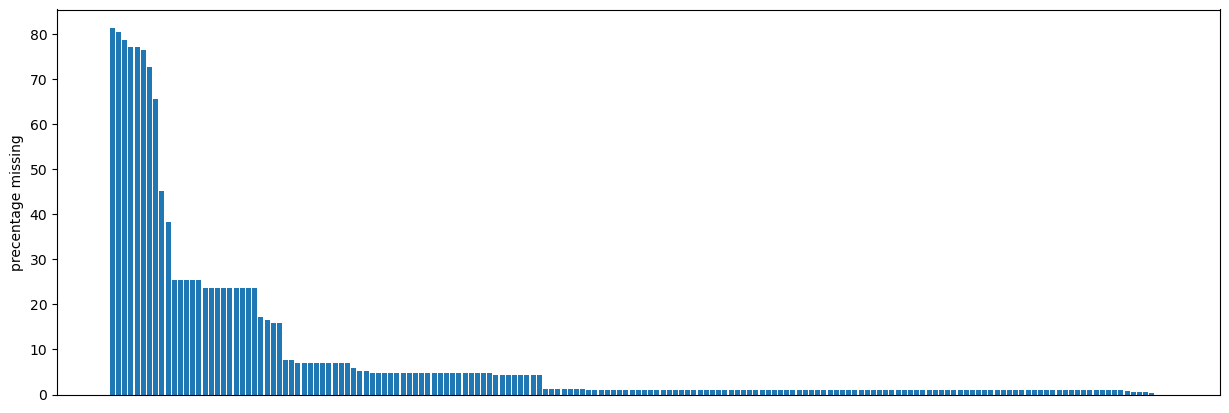

In [19]:
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(missing.index, missing.values.T[0])
plt.xticks([])
plt.ylabel("precentage missing")
plt.show()

In [ ]:
#since there are many columns having more than 70 % of missing values. Hence these columns are not necessary for building a
#better model
#70% or more - delete the columns



In [20]:
dropcolumns = missing[missing[0]>70]
dropcolumns

,0
br_000,81.410965
bq_000,80.501824
bp_000,78.794075
ab_000,77.086327
cr_000,77.086327
bo_000,76.533658
bn_000,72.761689


In [21]:
df.drop(dropcolumns.index, axis = 1,inplace = True)
df.shape

(36188, 164)

In [23]:
#find out total number of missing values in the dataset in percentage
missing_values = df.isnull().sum()
total = np.product(df.shape)     #row*col
total_missing = missing_values.sum()

print(f"precentage is {(total_missing/total)*100} %")

precentage is 5.37059852747306 %
